In [1]:
import pandas as pd
pd.options.display.max_columns=100
import numpy as np
from directory import data as data_dir, images

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn-ticks')
palette = sns.color_palette(palette='deep').as_hex()
%matplotlib inline
from paxplot import centroid_plot, cluster_plots
from nmf import drop_cols
from clustering import drop_columns

plt.rcParams['font.size'] = 16
sns.set_context(rc = {'patch.linewidth': 0.0})

In [3]:
labels = pd.read_pickle("{}/kmeanslabels.pkl".format(data_dir))
clean = pd.read_pickle("{}/clean.pkl".format(data_dir))
ozs = clean[clean['oz'] == 1].reset_index(drop=True)
all_e = clean[clean['eligible'] == 1]
not_picked = all_e[all_e['oz'] == 0]

In [4]:
drop_cols

['population_total2017',
 'household_income_median2017',
 'home_value_median2017',
 'housing_units_total2017',
 'age_median2017',
 'geoid',
 'oz',
 'LICadj',
 'eligible']

In [29]:
!open ../images/kmeans/k=6.png

In [6]:
k6 = labels[['k=6', 'k6silhouette_score']]
outliers_mask = k6['k6silhouette_score'] < 0
outliers = k6[outliers_mask]
outliers.groupby('k=6').agg({'k=6':'count'})

,k=6
k=6,
0,382
1,33
3,759
4,155
5,89


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [84]:
data_labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'other eligible tracts']
X_e = not_picked.drop(columns=drop_cols)
X_ozs = ozs.drop(columns=drop_cols)
features= X_e.columns

In [85]:
outliers_mask = k6['k6silhouette_score'] < 0
outliers = ozs[outliers_mask]
cluster_masks = []

for c in np.unique(k6['k=6']):
    cluster_masks.append(k6['k=6'] == c)

In [186]:
X_alle = all_e.drop(columns=drop_cols)
std_scaler = StandardScaler()
std_X = std_scaler.fit_transform(X_alle)
n = 9
paxPCA = PCA(n_components=n)
pca_all = paxPCA.fit(std_X)

Text(0.5, 1.0, 'No separation between designated and eligible but unpicked tracts')

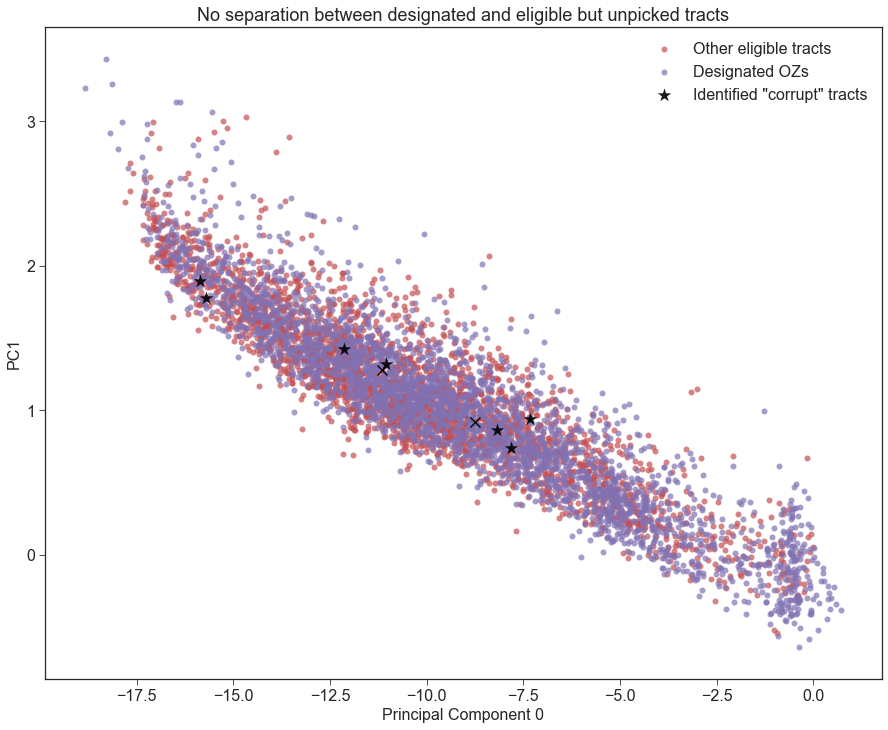

In [190]:
fig, ax = plt.subplots(figsize=(15, 12))
data_labels = ["Other eligible tracts", "Designated OZs"]
for i, p in enumerate(pca_objs):
    ## plotting the first two components
    pca_2comp_plot(ax, pca_all, data[i], n_points=3000, \
        scatter_kwargs={'color':palette[i+3],'alpha':0.7, 'label':data_labels[i]})

pca_2comp_plot(ax, pca_all, suspect, \
        scatter_kwargs={'color':'k', 'marker':"*", 's':200,\
                        'alpha':0.9, 'label':'Identified \"corrupt\" tracts'})
  
ax.set_title("No separation between designated and eligible but unpicked tracts", fontsize=18)

#plt.savefig("{}/pca_separation.png".format(images_directory), dpi=120, transparent=True)

In [125]:
pca_objs = []
data = [X_e, X_ozs]
for d in data:  
    std_scaler = StandardScaler()
    std_X = std_scaler.fit_transform(d)
    n = 9
    paxPCA = PCA(n_components=n)
    pca_objs.append(paxPCA.fit(std_X))

In [182]:
suspect = pd.read_pickle("{}/suspect_tracts.pkl".format(data_dir))
drop_columns(suspect, drop_cols)

,population_total2017,household_income_median2017,home_value_median2017,housing_units_total2017,age_median2017,geoid,oz,LICadj,eligible
14130,14944.0,65160.0,170100.0,5820.0,40.8,12086000109,1,0,1
16328,3251.0,57708.0,365700.0,2160.0,53.4,12099001700,1,0,1
28425,9734.0,50954.0,167300.0,3960.0,33.9,22071013400,1,0,1
29381,3833.0,54041.0,176300.0,2211.0,64.9,23005000300,1,0,1
29827,6357.0,122091.0,325000.0,1968.0,42.7,24033807000,1,0,1
29862,6121.0,54508.0,362600.0,1861.0,35.5,24033807200,1,0,1
65153,4278.0,39278.0,114600.0,1923.0,31.7,48201100000,1,0,1


Text(0.5, 1.0, 'Separation between designated and other eligible tracts')

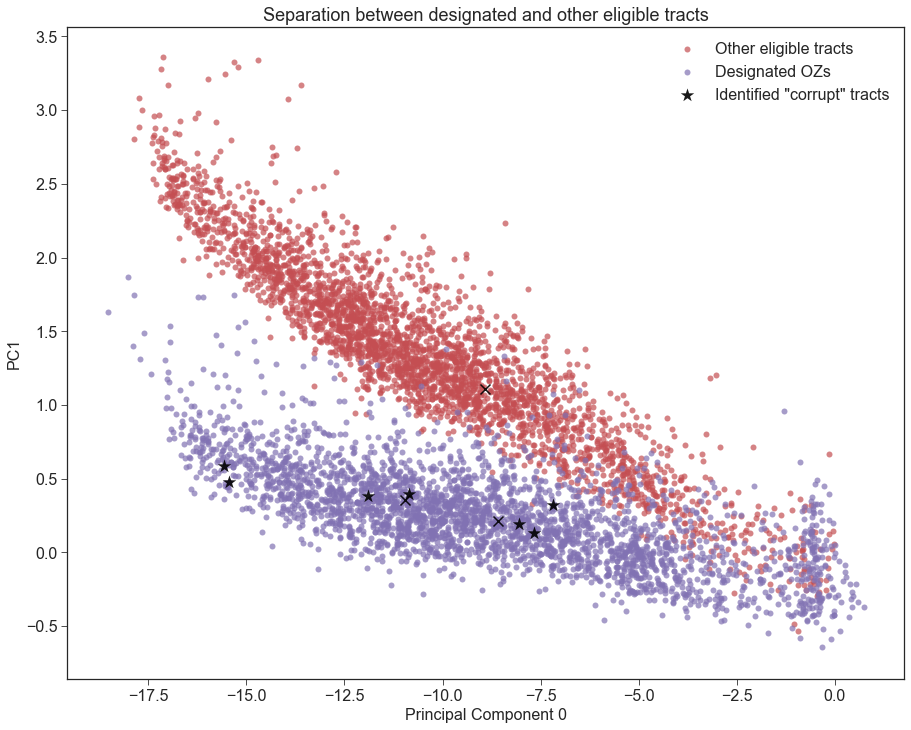

In [188]:
fig, ax = plt.subplots(figsize=(15, 12))
data_labels = ["Other eligible tracts", "Designated OZs"]
for i, p in enumerate(pca_objs):
    ## plotting the first two components
    pca_2comp_plot(ax, p, data[i], n_points=3000, \
        scatter_kwargs={'color':palette[i+3],'alpha':0.7, 'label':data_labels[i]})

pca_2comp_plot(ax, p, suspect, \
        scatter_kwargs={'color':'k', 'marker':"*", 's':200,\
                        'alpha':0.9, 'label':'Identified \"corrupt\" tracts'})
  
ax.set_title("Separation between designated and other eligible tracts", fontsize=18)

#plt.savefig("{}/pca_separation.png".format(images_directory), dpi=120, transparent=True)

Text(0.5, 1.0, 'Separation between designated and other eligible tracts')

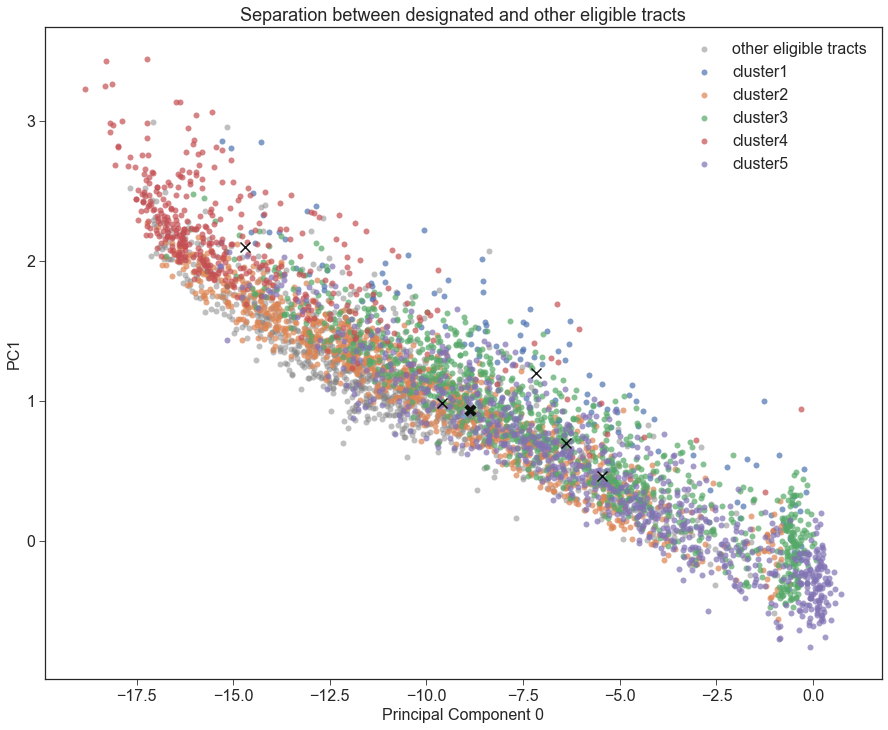

In [214]:
fig, ax = plt.subplots(figsize=(15, 12))
data_labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6', 'other eligible tracts']
for i, p in enumerate(pca_objs):
    ## plotting the first two components
    if i == 1: ## in other words, if we're working on oz data
        for j, mask in enumerate(cluster_masks[1:6]):
            pca_2comp_plot(ax, pca_all, data[i][mask], n_points=1000, \
                scatter_kwargs={'color':palette[j],'alpha':0.7, 'label':data_labels[j]})
    else:
        pca_2comp_plot(ax, pca_all, data[i], n_points=1000,\
            scatter_kwargs={'color':'gray','alpha':0.5, 'label':data_labels[-1]},\
            centroid_kwargs={'marker':"X", 's':150})
  
ax.set_title("Separation between designated and other eligible tracts", fontsize=18)

#plt.savefig("{}/pca_separation.png".format(images_directory), dpi=120, transparent=True)

In [211]:
def pca_2comp_plot(ax, pca_object, data, show_centroid=True,\
                   n_points=2000, scatter_kwargs={}, centroid_kwargs={}):
    '''
    Set title, savefig, tight_layout outside.
    
    '''
    component_a = pca_object.components_[0]
    component_b = pca_object.components_[1]
    x = np.dot(data.values, component_a)[:n_points]
    y = np.dot(data.values, component_b)[:n_points]
    # key kwargs are color, alpha, label
    ax.scatter(x, y, **scatter_kwargs)
    
    if show_centroid:
        centroid = np.mean(data, axis=0)
        pca_centroid = np.dot(pca_object.components_[:2], centroid)
        
        default_kwargs = {'s':100, 'color':"k", 'marker':'x', 'alpha':0.9, 'zorder':10000}
        for key in centroid_kwargs:
            default_kwargs[key] = centroid_kwargs[key]
        ax.scatter(pca_centroid[0], pca_centroid[1], **default_kwargs)
        
    ax.legend(fontsize=16)
    ax.set_xlabel("Principal Component 0", fontsize=16)
    ax.set_ylabel("PC1", fontsize=16)